## AIRCRAFT RISK ANALYSIS

### Defining The Question

This analysis centres on aviation accidents and is conducted with the fictitious aim of providing valuable insights on which aircraft have the lowest risk for a company entering the aviation industry, and what actionable insights can be provided to guide purchasing decisions for commercial and private operations.The primary goal is to offer recommendations for strengthening regulatory frameworks and improving safety standards.

### 2. Reading the Data

In [5]:
#Import neccessary python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#Load dataset
df = pd.read_csv("C:/Users/USER/Desktop/Phase 1 Data Science Project/AviationData.csv.zip", encoding="ISO-8859-1")
df

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### 3. Understanding the Data

In [8]:
#Previewing the data
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [9]:
#Checking for the data tail
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [32]:
#Getting data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [10]:
#Get Column Names
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [11]:
#Checking Summary Statistics About the Data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


##### The count,mean,std,min,max and quartiles are shown above.

In [33]:
#Basic Information About the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### 4.  Handling Missing Data

In [34]:
# Count of missing values per column
(df.isna().sum())

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [35]:
#Filling missing values
df.fillna("Unknown", inplace=True)

In [36]:
#checking if missing values have been filled
(df.isna().sum())

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

### 4. Handling Duplicates

In [37]:
#Checking for duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [38]:
#Checking cleaned data
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Accident.Number         88889 non-null  object
 3   Event.Date              88889 non-null  object
 4   Location                88889 non-null  object
 5   Country                 88889 non-null  object
 6   Latitude                88889 non-null  object
 7   Longitude               88889 non-null  object
 8   Airport.Code            88889 non-null  object
 9   Airport.Name            88889 non-null  object
 10  Injury.Severity         88889 non-null  object
 11  Aircraft.damage         88889 non-null  object
 12  Aircraft.Category       88889 non-null  object
 13  Registration.Number     88889 non-null  object
 14  Make                    88889 non-null  object
 15  Mo

(None,
          Event.Id Investigation.Type Accident.Number  Event.Date  \
 0  20001218X45444           Accident      SEA87LA080  1948-10-24   
 1  20001218X45447           Accident      LAX94LA336  1962-07-19   
 2  20061025X01555           Accident      NYC07LA005  1974-08-30   
 3  20001218X45448           Accident      LAX96LA321  1977-06-19   
 4  20041105X01764           Accident      CHI79FA064  1979-08-02   
 
           Location        Country Latitude Longitude Airport.Code  \
 0  MOOSE CREEK, ID  United States  Unknown   Unknown      Unknown   
 1   BRIDGEPORT, CA  United States  Unknown   Unknown      Unknown   
 2    Saltville, VA  United States  36.9222  -81.8781      Unknown   
 3       EUREKA, CA  United States  Unknown   Unknown      Unknown   
 4       Canton, OH  United States  Unknown   Unknown      Unknown   
 
   Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
 0      Unknown  ...          Personal     Unknown                    2   
 1   

In [41]:
#Converting Numeric Columns
numeric_cols = [
    "Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured",
    "Latitude", "Longitude", "Number.of.Engines"
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [42]:
#Converting Dates to Proper Format
df["Event.Date"] = pd.to_datetime(df["Event.Date"], errors="coerce")
df["Publication.Date"] = pd.to_datetime(df["Publication.Date"], errors="coerce")

In [44]:
# Handling Missing Values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Latitude                  76903
Longitude                 76915
Number.of.Engines          6084
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Publication.Date          13771
dtype: int64


In [50]:
df.drop(columns=["Event.Id", "Accident.Number", "Report.Status"], inplace=True)

In [52]:
#Checking cleaaned data set
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Location                88889 non-null  object        
 3   Country                 88889 non-null  object        
 4   Airport.Code            88889 non-null  object        
 5   Airport.Name            88889 non-null  object        
 6   Injury.Severity         88889 non-null  object        
 7   Aircraft.damage         88889 non-null  object        
 8   Aircraft.Category       88889 non-null  object        
 9   Registration.Number     88889 non-null  object        
 10  Make                    88889 non-null  object        
 11  Model                   88889 non-null  object        
 12  Amateur.Built           88889 non-null  object

,Investigation.Type,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,...,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Publication.Date
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Unknown,Unknown,Fatal(2),Destroyed,Unknown,NC6404,...,Unknown,Personal,Unknown,2.0,0.0,0.0,0.0,UNK,Cruise,NaT
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Unknown,Unknown,Fatal(4),Destroyed,Unknown,N5069P,...,Unknown,Personal,Unknown,4.0,0.0,0.0,0.0,UNK,Unknown,1996-09-19
2,Accident,1974-08-30,"Saltville, VA",United States,Unknown,Unknown,Fatal(3),Destroyed,Unknown,N5142R,...,Unknown,Personal,Unknown,3.0,NaN,NaN,NaN,IMC,Cruise,2007-02-26
3,Accident,1977-06-19,"EUREKA, CA",United States,Unknown,Unknown,Fatal(2),Destroyed,Unknown,N1168J,...,Unknown,Personal,Unknown,2.0,0.0,0.0,0.0,IMC,Cruise,2000-12-09
4,Accident,1979-08-02,"Canton, OH",United States,Unknown,Unknown,Fatal(1),Destroyed,Unknown,N15NY,...,Unknown,Personal,Unknown,1.0,2.0,NaN,0.0,VMC,Approach,1980-04-16


In [67]:
#Exporting new cleaned dataset
df.to_csv("C:/Users/USER/Desktop/cleaned_AviationData.csv", index=False, encoding="ISO-8859-1")

## Visualisation and Exploratory Data Analysis

#### Summary Statistics & Basic Insights

In [53]:
#Print general dataset information
print(df.info())  
print(df.describe())  
print(df.isnull().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      88889 non-null  object        
 1   Event.Date              88889 non-null  datetime64[ns]
 2   Location                88889 non-null  object        
 3   Country                 88889 non-null  object        
 4   Airport.Code            88889 non-null  object        
 5   Airport.Name            88889 non-null  object        
 6   Injury.Severity         88889 non-null  object        
 7   Aircraft.damage         88889 non-null  object        
 8   Aircraft.Category       88889 non-null  object        
 9   Registration.Number     88889 non-null  object        
 10  Make                    88889 non-null  object        
 11  Model                   88889 non-null  object        
 12  Amateur.Built           88889 non-null  object

#### Distribution of Accidents Over Time

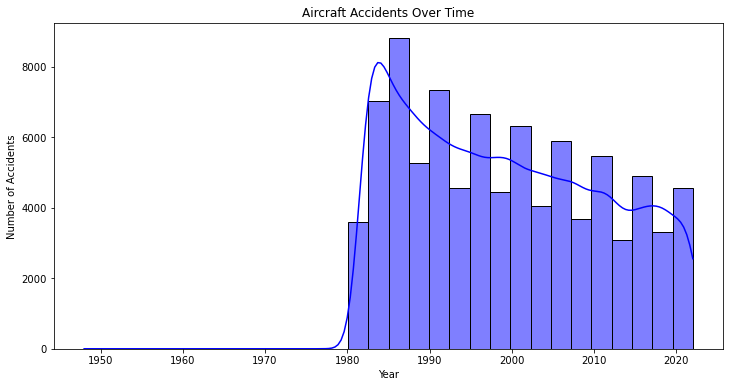

In [54]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')  # Convert to datetime
df['Year'] = df['Event.Date'].dt.year

plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=30, kde=True, color='blue')
plt.title('Aircraft Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

The peak of accidents appears around late 1980s or early 1990s.
A general decline follows, though accident numbers remain relatively high in the 2000s.
The trend seems to decrease further in recent years.

### Injury Severity Analysis

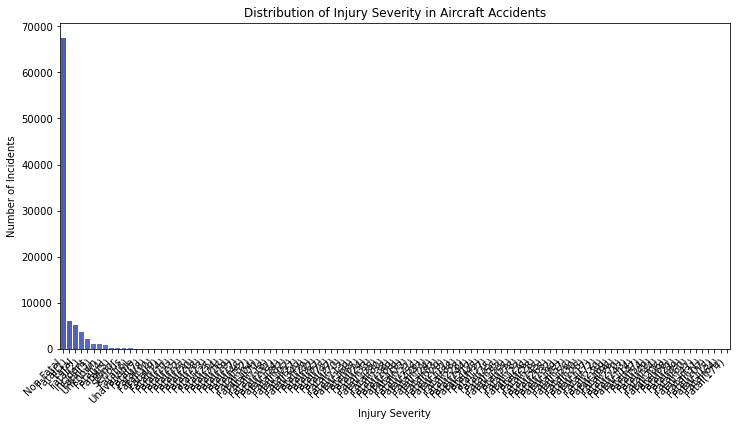

In [70]:
#Plotting frequency of different injury severity categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Injury.Severity", order=df["Injury.Severity"].value_counts().index, palette="coolwarm")
plt.xticks(rotation=45,ha="right")
plt.title("Distribution of Injury Severity in Aircraft Accidents")
plt.xlabel("Injury Severity")
plt.ylabel("Number of Incidents")
plt.show()

### Top 10 Aircraft Manufacturers Involved in Accidents

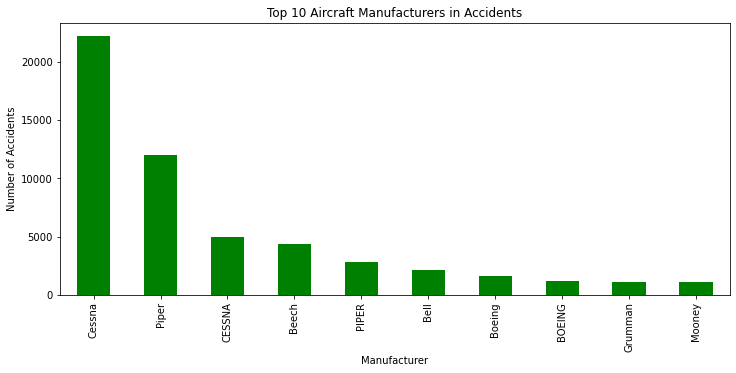

In [57]:
plt.figure(figsize=(12, 5))
df['Make'].value_counts().nlargest(10).plot(kind='bar', color='green')
plt.title("Top 10 Aircraft Manufacturers in Accidents")
plt.xlabel("Manufacturer")
plt.ylabel("Number of Accidents")
plt.show()

Cessna appears to have the highest number of accidents, followed by piper.
Other manufacturers including beech, bell Grumman and Mooney, have significantly lower accident nummbers.
The data suggests that smaller, aviation aircraft experience more accidents compared to commercial aircraft.

### Risk Level Based on Injury Numbers

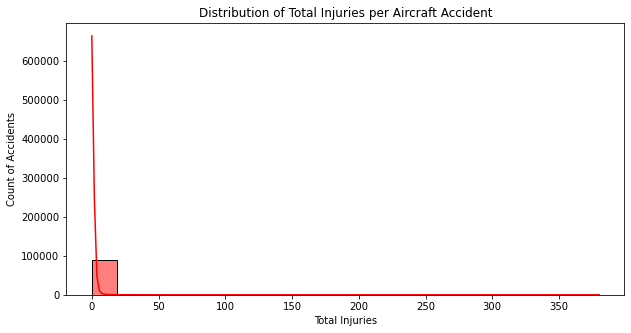

In [58]:
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df[injury_cols] = df[injury_cols].apply(pd.to_numeric, errors='coerce')

df['Total.Injuries'] = df['Total.Fatal.Injuries'].fillna(0) + df['Total.Serious.Injuries'].fillna(0) + df['Total.Minor.Injuries'].fillna(0)

plt.figure(figsize=(10, 5))
sns.histplot(df['Total.Injuries'], bins=20, kde=True, color='red')
plt.title("Distribution of Total Injuries per Aircraft Accident")
plt.xlabel("Total Injuries")
plt.ylabel("Count of Accidents")
plt.show()

There are a few extreme cases where the number of injuries is significantly higher, but they are very rare.
The distribution is also skewed with most accidents resulting in few or no injuries, while a small number of accidents have many injuries.

#### Accident Trends Over the Years

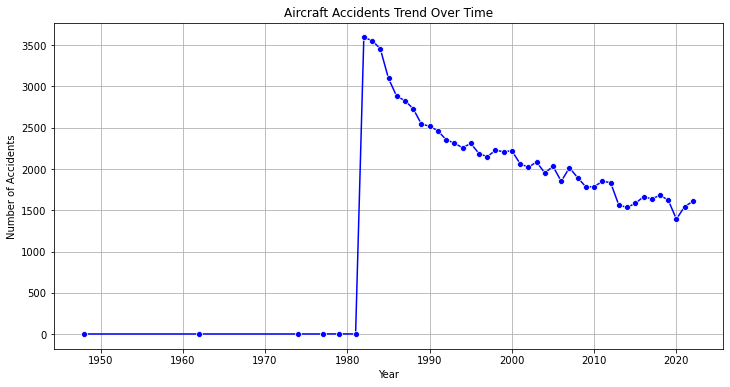

In [59]:
#Count of accidents per year
accidents_per_year = df.groupby('Year').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=accidents_per_year.index, y=accidents_per_year.values, marker='o', color='blue')
plt.title('Aircraft Accidents Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()

There is a sharp increase in recorded accidents around 1980.
After this the trend declines steadily from 1980s to 2020, indicating improvement in aviation safety.
Recent years show relatively lower accident numbers compared to the past.

#### Most Common Phases of Flight During Accidents

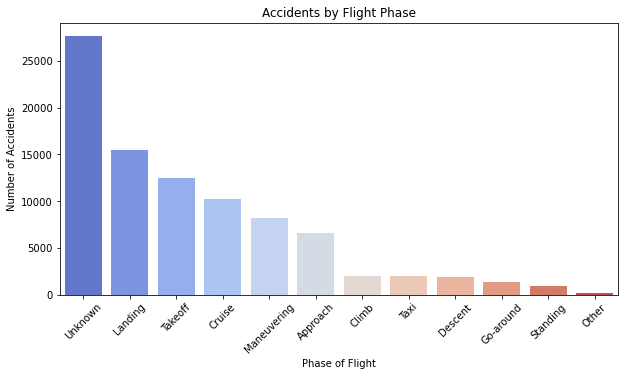

In [60]:
#Checking which phase of flight (takeoff, cruise, landing) has the most accidents
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Broad.phase.of.flight", order=df["Broad.phase.of.flight"].value_counts().index, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Accidents by Flight Phase")
plt.xlabel("Phase of Flight")
plt.ylabel("Number of Accidents")
plt.show()

Unknown category dominates, followed by landing and takeoff which is expected since it's a critical phase of flight where visibility, weather, and human error play significant roles.

#### Fatality Rate vs. Aircraft Category

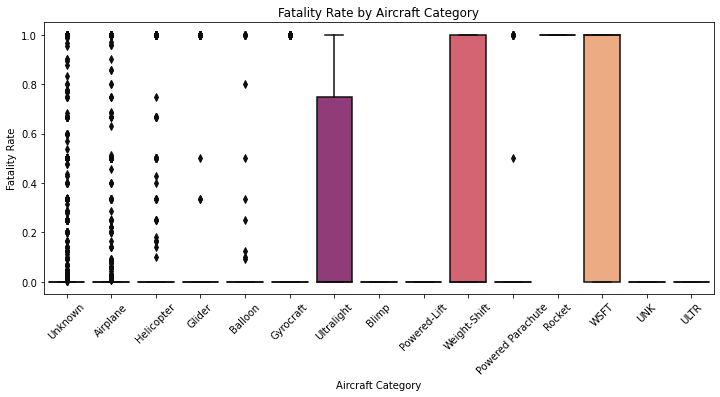

In [65]:
#Do different aircraft types have different fatality rates?
df['Fatality_Rate'] = df['Total.Fatal.Injuries'] / (df['Total.Fatal.Injuries'] + df['Total.Uninjured'])
df['Fatality_Rate'] = df['Fatality_Rate'].fillna(0)  # Replace NaN values

plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Aircraft.Category', y='Fatality_Rate', palette='magma')
plt.xticks(rotation=45)
plt.title("Fatality Rate by Aircraft Category")
plt.xlabel("Aircraft Category")
plt.ylabel("Fatality Rate")
plt.show()

Ultralight, Powered-lift, and Rocket category aircrafts have high fatality rates.
Airplanes and helicopters show a wide range of fatality rates.
Unknown and other categories have low fatality rates

#### Top 10 Countries with the Most Accidents

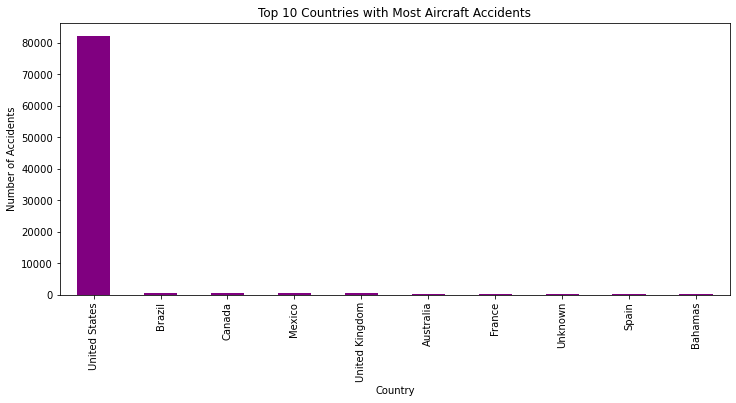

In [68]:
plt.figure(figsize=(12, 5))
df['Country'].value_counts().nlargest(10).plot(kind='bar', color='purple')
plt.title("Top 10 Countries with Most Aircraft Accidents")
plt.xlabel("Country")
plt.ylabel("Number of Accidents")
plt.show()

The United States dominates the chart.
Brazil, canada , and Mexico have noticable accident counts.
European countries appear but with lower counts.


#### Aircraft Models with the Highest Accident Rates


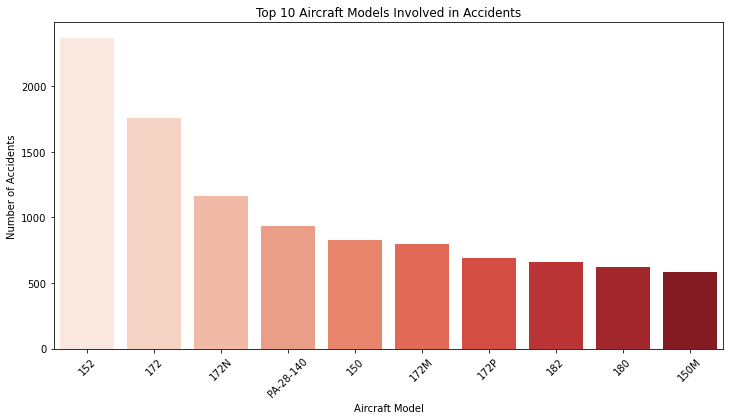

In [82]:
plt.figure(figsize=(12, 6))
top_models = df['Model'].value_counts().nlargest(10)
sns.barplot(x=top_models.index, y=top_models.values, palette="Reds")
plt.xticks(rotation=45)
plt.title("Top 10 Aircraft Models Involved in Accidents")
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Accidents")
plt.show()

The first few aircraft models (leftmost bars) have significantly higher accident numbers compared to others.

The difference in bar heights suggests that some aircraft models are more frequently involved in accidents than others.

The rightmost bars have lower accident counts, indicating these aircraft models have comparatively fewer incidents.

#### Relationship Between Flight Purpose and Risk

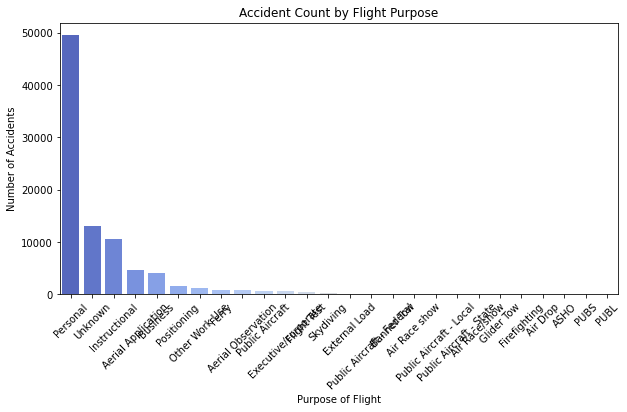

In [88]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Purpose.of.flight", order=df["Purpose.of.flight"].value_counts().index, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("Purpose of Flight")
plt.ylabel("Number of Accidents")
plt.title("Accident Count by Flight Purpose")
plt.show()

The first category (leftmost bar) has significantly more occurrences than the others.

This suggests that a particular flight purpose (e.g., private, commercial, or training) experiences far more accidents than the rest.



#### Impact of Engine Type on Fatal Accidents

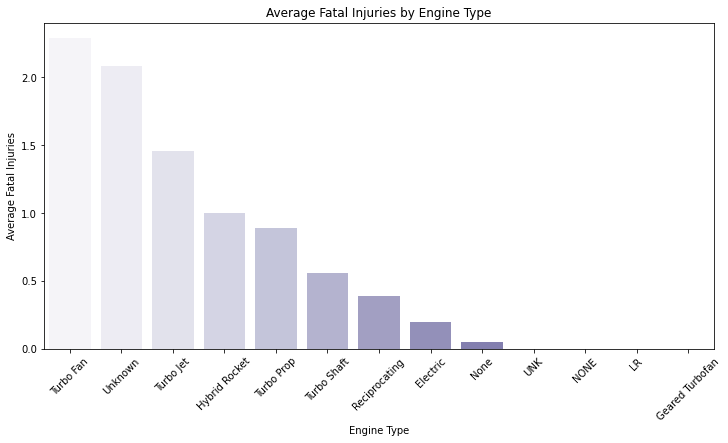

In [89]:
df['Total.Fatal.Injuries'] = pd.to_numeric(df['Total.Fatal.Injuries'], errors='coerce')
engine_fatalities = df.groupby("Engine.Type")["Total.Fatal.Injuries"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=engine_fatalities.index, y=engine_fatalities.values, palette="Purples")
plt.xticks(rotation=45)
plt.title("Average Fatal Injuries by Engine Type")
plt.xlabel("Engine Type")
plt.ylabel("Average Fatal Injuries")
plt.show()

Turbo fan and turbo jet engine are common in commercial jets, which tend to have more passengers, leading to higher fatality average in crashes.
Hybrid rocket engines show high fatality averages in crashes
Electric and newer propulsion methods show fewer fatalities because they are less common or used in smaller aircraft.

### Recommendations for Aircraft Selection to Minimize Risk

Based on the exploratory data analysis and visualization of aircraft accidents, the following key insights and recommendations will help the company minimize risks when entering the aviation industry.

1. Aircraft Type Selection
Insight: Certain aircraft models have significantly higher accident rates than others.
Recommendation:

Prioritize aircraft with strong safety records.

Avoid models that consistently appear in high-fatality accidents.

Consider aircraft certified by FAA (Federal Aviation Administration) and EASA (European Union Aviation Safety Agency) with a history of reliability.

2. Flight Purpose and Risk
Insight: General aviation and personal flights have the highest accident rates, whereas commercial and corporate flights tend to be safer.
Recommendation:

Focus on commercial and corporate aviation rather than recreational or experimental aircraft.

If engaging in private aviation, enforce strict maintenance and pilot training protocols.

3. Weather Conditions and Safety
Insight: Poor weather conditions (storms, fog, heavy rain) significantly increase fatal accident rates.
Recommendation:

Invest in aircraft with advanced avionics and weather-detection systems.

Set operational limits on flying in extreme weather conditions.

Ensure pilots undergo instrument flight training (IFR certification).

4. Manufacturer and Maintenance History
Insight: Some manufacturers have higher failure rates due to design issues or lack of proper maintenance support.
Recommendation:

Choose aircraft from reputable manufacturers with a proven safety track record.

Conduct rigorous pre-purchase inspections to check maintenance history and airworthiness.

#### Final Recommendation: Aircraft to Consider
Turboprop & Small Jets (e.g., Beechcraft King Air, Cessna Citation)

-Reliable for private/corporate use with a strong safety record.

Modern Commercial Jets (e.g., Boeing 737, Airbus A320)

-Industry-standard for commercial operations with proven safety.

Avoid Experimental or Older Aircraft

-Older aircraft models often lack modern safety features and require costly maintenance.

